In [22]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#if Geopandas/scikit-learn/matplotlib is not working in your Environment please install it
# !pip install geopandas
# !pip install scikit-learn
# !pip install matplotlib

Please upload data from '**Workshop data**' folder to '**Files**' in your Google Collab

In [23]:
data = pd.read_csv('Miami_20_SV_data_Norm_HD_CIROHDevCon25.csv')
df = pd.DataFrame(data)

In [24]:
SV_data = data.drop(columns=['Geographic Area Name'])
SV_data.head(5)

,Geography,POV_kids5years%,POV_Fem_NoSpouse%,AgeAbove65%,HealthIns65%,NoVeh%,Fem_NoSpouse%,AgeUnder5%,POV_Income12m%,Language_NoEnglish%,...,RenterOccupied5+%,No_School%,NoComp_NoInt%,Pop_Den,UnemployedCiv%,MobileHome%,BlackPop%,RenterOccupied%,HispanicPOP%,Household_Size_avg
0,1500000US120860001071,0.0,0.00,28.54,1.24,5.94,24.83,2.85,5.59,0.00,...,8.42,0.00,0.00,3374.42,0.00,0.00,2.47,54.21,28.16,2.60
1,1500000US120860001072,0.0,10.43,14.90,0.00,9.78,27.01,1.80,16.59,4.41,...,0.00,5.00,16.25,12576.88,4.80,1.38,1.60,84.54,59.40,1.58
2,1500000US120860001073,0.0,12.68,32.74,0.00,34.07,22.54,0.00,15.96,0.00,...,1.28,1.56,14.29,4168.69,0.00,0.00,0.00,50.92,53.33,1.76
3,1500000US120860001091,0.0,0.00,7.69,0.00,5.63,14.71,0.00,2.35,8.20,...,0.00,0.00,44.37,3940.15,0.00,31.30,3.15,74.65,73.60,2.01
4,1500000US120860001092,0.0,0.00,10.87,2.53,9.31,4.54,6.10,20.62,6.16,...,4.97,1.81,14.29,245.25,1.24,0.00,5.06,71.17,57.99,2.63


***Weights of Social Indicators***

In [25]:
criteria = ['POV_kids5years%', 'POV_Fem_NoSpouse%', 'AgeAbove65%', 'HealthIns65%','MobileHome%', 'NoVeh%', 'Fem_NoSpouse%', 'AgeUnder5%',
            'POV_Income12m%', 'Language_NoEnglish%', 'Disability%', 'RenterOccupied5+%', 'No_School%', 'NoComp_NoInt%', 'Pop_Den', 'UnemployedCiv%',
            'BlackPop%', 'RenterOccupied%', 'HispanicPOP%', 'Household_Size_avg', ]
weights = [7.7, 5.4, 9, 3.5, 3.6, 8.2, 2.5, 7.5, 5.5, 8.1, 10.5, 2.8, 2.4, 5.4, 4.2, 3.3, 3.05, 1.4, 3.5, 2.05]     # weights

**--- Step 1: Calculate the normalized performance ratings. ---**

Vector Normalization should be applied to obtain normalized performance ratings. In this procedure, each performance rating 𝑥𝑖𝑗 in 𝑋 is divided by its norm. The normalized ratings 𝑦𝑖𝑗 (𝑖 = 1, 2,…, 𝐼; 𝑗 = 1, 2,…, 𝐽) can be calculated by Eq 1 below
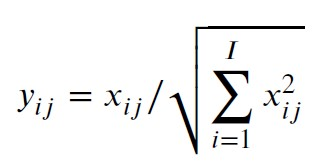

In [27]:
X = df[criteria].values.astype(float)
norm = np.linalg.norm(X, axis=0)
X_norm = X / norm

In [28]:
norm_data = pd.DataFrame(X_norm, columns=criteria)
norm_data.head(5)

,POV_kids5years%,POV_Fem_NoSpouse%,AgeAbove65%,HealthIns65%,MobileHome%,NoVeh%,Fem_NoSpouse%,AgeUnder5%,POV_Income12m%,Language_NoEnglish%,Disability%,RenterOccupied5+%,No_School%,NoComp_NoInt%,Pop_Den,UnemployedCiv%,BlackPop%,RenterOccupied%,HispanicPOP%,Household_Size_avg
0,0.0,0.000000,0.031780,0.022295,0.000000,0.009174,0.018496,0.009497,0.007308,0.000000,0.028793,0.024765,0.000000,0.000000,0.010858,0.000000,0.002041,0.023782,0.009156,0.020892
1,0.0,0.021743,0.016591,0.000000,0.003681,0.015105,0.020120,0.005998,0.021688,0.008719,0.003969,0.000000,0.032207,0.017621,0.040468,0.030984,0.001322,0.037088,0.019313,0.012696
2,0.0,0.026433,0.036456,0.000000,0.000000,0.052621,0.016790,0.000000,0.020865,0.000000,0.008757,0.003765,0.010049,0.015496,0.013413,0.000000,0.000000,0.022339,0.017340,0.014143
3,0.0,0.000000,0.008563,0.000000,0.083494,0.008696,0.010957,0.000000,0.003072,0.016211,0.028683,0.000000,0.000000,0.048114,0.012678,0.000000,0.002603,0.032749,0.023930,0.016151
4,0.0,0.000000,0.012104,0.045489,0.000000,0.014379,0.003382,0.020326,0.026957,0.012178,0.019097,0.014618,0.011659,0.015496,0.000789,0.008004,0.004182,0.031223,0.018855,0.021133


**--- Step 2: Integrate weigh with norm ratings.---**

Multiply weigh (Wj) with norm ratings (yij) to form the weighted-normalized decision matrix 𝑉ij in Eq. 2 below 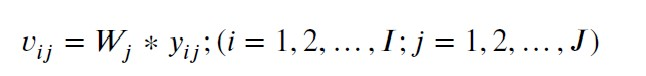
 …


In [29]:
X_weighted = X_norm * weights

In [30]:
Weighted_data = pd.DataFrame(X_weighted, columns=criteria)
Weighted_data.head(5)

,POV_kids5years%,POV_Fem_NoSpouse%,AgeAbove65%,HealthIns65%,MobileHome%,NoVeh%,Fem_NoSpouse%,AgeUnder5%,POV_Income12m%,Language_NoEnglish%,Disability%,RenterOccupied5+%,No_School%,NoComp_NoInt%,Pop_Den,UnemployedCiv%,BlackPop%,RenterOccupied%,HispanicPOP%,Household_Size_avg
0,0.0,0.000000,0.286016,0.078033,0.000000,0.075230,0.046239,0.071225,0.040193,0.000000,0.302330,0.069342,0.000000,0.000000,0.045602,0.000000,0.006226,0.033295,0.032046,0.042829
1,0.0,0.117410,0.149321,0.000000,0.013252,0.123863,0.050299,0.044984,0.119286,0.070621,0.041671,0.000000,0.077296,0.095155,0.169966,0.102246,0.004033,0.051924,0.067597,0.026027
2,0.0,0.142738,0.328106,0.000000,0.000000,0.431493,0.041975,0.000000,0.114756,0.000000,0.091946,0.010541,0.024116,0.083678,0.056336,0.000000,0.000000,0.031275,0.060689,0.028992
3,0.0,0.000000,0.077066,0.000000,0.300578,0.071303,0.027394,0.000000,0.016897,0.131312,0.301170,0.000000,0.000000,0.259817,0.053248,0.000000,0.007940,0.045849,0.083757,0.033110
4,0.0,0.000000,0.108934,0.159212,0.000000,0.117910,0.008455,0.152446,0.148262,0.098645,0.200522,0.040930,0.027981,0.083678,0.003314,0.026414,0.012754,0.043712,0.065992,0.043323


**--- Step 3: Find the ideal best and worst solution ---**

Find the positive and negative ideal solution sets. 𝐴∗ and 𝐴− are denoted as the positive and negative ideal solution sets respectively (Eq. 3) below.
 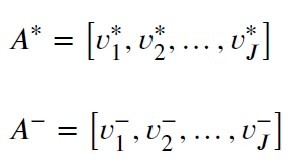


In [31]:
ideal_best = np.max(X_weighted, axis=0)
ideal_worst = np.min(X_weighted, axis=0)

In [32]:
ideal_best

array([2.72574759, 1.12569101, 0.89803284, 1.05595902, 0.9384194 ,
       0.92833722, 0.18622431, 0.94891538, 0.71902077, 1.09149511,
       0.77936831, 0.5737637 , 0.36885756, 0.43062725, 1.05678516,
       0.43092427, 0.24795097, 0.06141897, 0.11379963, 0.10262562])

**-- Step 4: Calculate separation from ideal best and worst ---**

The separation measure is the distance of each alternative rating from both the positive (Si*) and negative (Si-) ideal solutions which is obtained by applying the Euclidean distance theory using Eq 4 below.

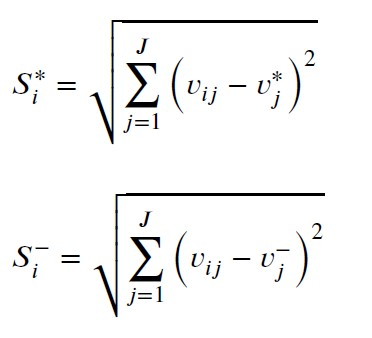


In [33]:
S_plus = np.sqrt(np.sum((X_weighted - ideal_best)**2, axis=1))
S_minus = np.sqrt(np.sum((X_weighted - ideal_worst)**2, axis=1))

In [34]:
S = pd.DataFrame({
    'S_plus': S_plus,
    'S_minus': S_minus
})

S.head(5)

,S_plus,S_minus
0,4.019886,0.452416
1,3.986918,0.373412
2,3.965754,0.594953
3,3.993412,0.539416
4,3.978571,0.405987


**--- Step 5: Calculate overall TOPSIS score ---**

The overall preference score 𝑉𝑖 for each alternative 𝐴𝑖 is obtained as shown in Eq. 5. Alternatives are ranked based on higher 𝑉𝑖 values.
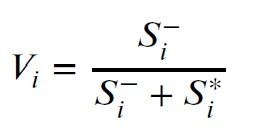

In [35]:
Vi = S_minus / (S_plus + S_minus)

In [36]:
df['TOPSIS_Score'] = Vi
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)

print(df[['Geography', 'TOPSIS_Score', 'Rank']].head(5))

               Geography  TOPSIS_Score    Rank
0  1500000US120860001071      0.101160  1065.0
1  1500000US120860001072      0.085639  1363.0
2  1500000US120860001073      0.130452   598.0
3  1500000US120860001091      0.119002   759.0
4  1500000US120860001092      0.092595  1215.0


In [37]:
df.to_csv('TOPSISvalueMiami20SVCIROH2.csv', index=False)

****Visualizing the Social Vulnerability Maps of Miami-Dade County****

In [38]:
# Load CSV data
csv_path = "TOPSISvalueMiami20SVCIROH2.csv"
csv_data = pd.read_csv(csv_path)


In [39]:
# Load shapefile
shapefile_path = "BlockGroup_MiamiDade_County.shp"
gdf = gpd.read_file(shapefile_path)

In [40]:
# Merge CSV data with shapefile data on 'Geography'
merged = gdf.merge(csv_data, on="Geography")

In [41]:
# Choose a column to visualize
column_to_plot = "TOPSIS_Score"

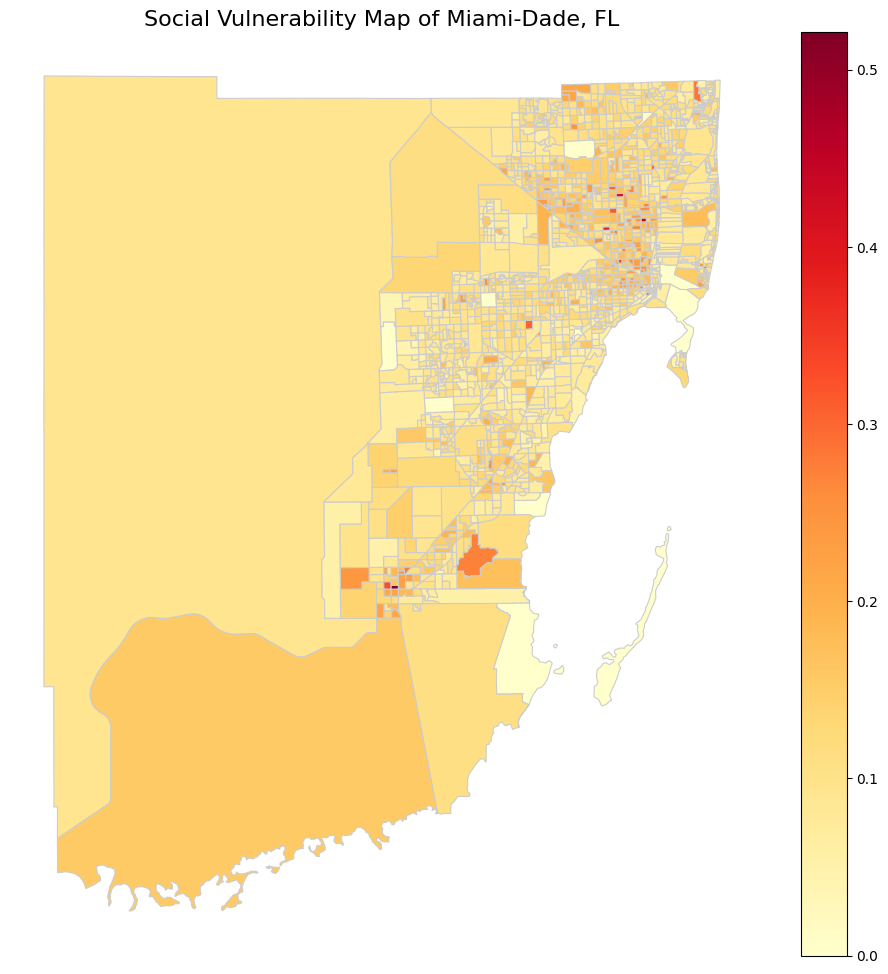

In [45]:
# Plotting the SVI map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged.plot(column=column_to_plot,
            cmap='YlOrRd',
            linewidth=0.8,
            edgecolor='0.8',
            legend=True,
            ax=ax)

ax.set_title(f"Social Vulnerability Map of Miami-Dade, FL", fontsize=16)
ax.axis('off')
plt.show()

In [44]:
# Export the joined shapefile
merged.to_file("MiamiDade_SVI_Maps.shp")

<ipython-input-44-a9d86a428662>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged.to_file("MiamiDade_SVI_Maps.shp")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Geographic Area Name' to 'Geographic'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'POV_kids5years%' to 'POV_kids5y'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'POV_Fem_NoSpouse%' to 'POV_Fem_No'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'AgeAbove65%' to 'AgeAbove65'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'HealthIns65%' to 'HealthIns6'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/py